In [ ]:
import pandas as pd

df = pd.read_csv("~/Desktop/kidlit/data/books_llm_tags.csv")
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            302 non-null    object
 1   author           302 non-null    object
 2   goodreads_url    302 non-null    object
 3   ol_title         302 non-null    object
 4   ol_author        302 non-null    object
 5   cover_url        301 non-null    object
 6   openlibrary_url  302 non-null    object
 7   description      302 non-null    object
 8   title_clean      302 non-null    object
 9   author_clean     302 non-null    object
 10  summary_gpt      302 non-null    object
 11  themes           302 non-null    object
 12  tone             302 non-null    object
 13  age_range        302 non-null    object
 14  needs_fix        302 non-null    bool  
dtypes: bool(1), object(14)
memory usage: 33.5+ KB


,title,author,goodreads_url,ol_title,ol_author,cover_url,openlibrary_url,description,title_clean,author_clean,summary_gpt,themes,tone,age_range,needs_fix
count,302,302,302,302,302,301,302,302,302,302,302,302,302,302,302
unique,302,188,302,301,188,300,301,301,302,188,302,298,59,25,1
top,Where the Wild Things Are,Dr. Seuss,https://www.goodreads.com/book/show/19543.Wher...,The Jungle Book,Dr. Seuss,https://covers.openlibrary.org/b/id/3344204-L.jpg,https://openlibrary.org/works/OL19870W,"The adventures of Mowgli, a man-child raised b...",Where The Wild Things Are,Dr. Seuss,A story about a boy named Max who journeys to ...,"imagination, friendship, adventure",whimsical,3-5,False
freq,1,13,1,2,13,2,2,2,1,13,1,3,71,102,302


<Axes: >

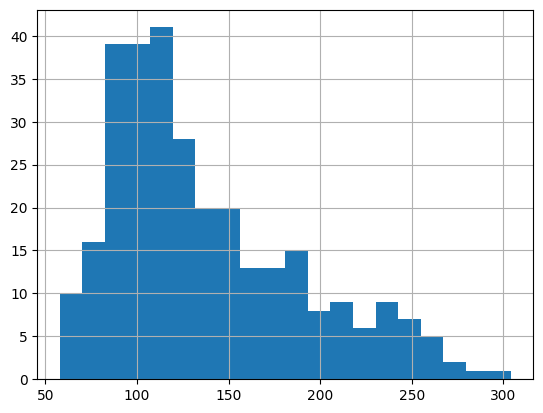

In [4]:
df["summary_length"] = df["summary_gpt"].str.len()
df["summary_length"].hist(bins=20)

<Axes: title={'center': 'Books per Age Range'}, xlabel='age_range'>

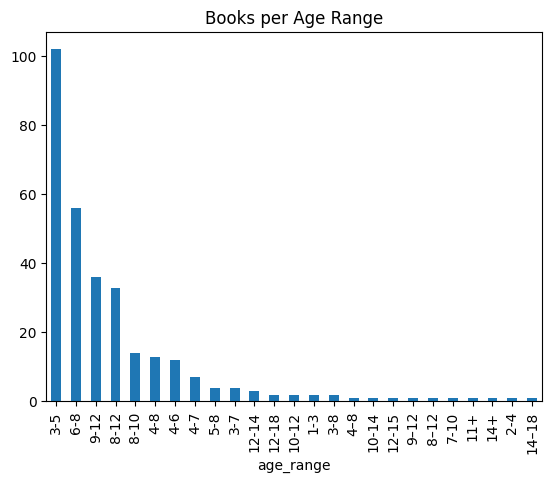

In [5]:
df["age_range"].value_counts().plot(kind="bar", title="Books per Age Range")


<Axes: title={'center': 'Tone Distribution'}, xlabel='tone'>

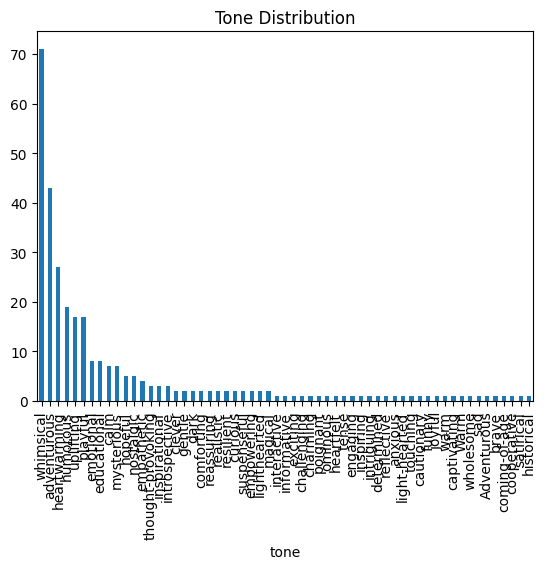

In [6]:
df["tone"].value_counts().plot(kind="bar", title="Tone Distribution")


In [14]:
print(df["tone"].value_counts().head(20))

tone
whimsical            71
adventurous          43
heartwarming         27
humorous             19
uplifting            17
playful              17
emotional             8
educational           8
calm                  7
mysterious            7
hopeful               5
nostalgic             5
empathetic            4
thought-provoking     3
inspirational         3
introspective         3
clever                2
gentle                2
dark                  2
comforting            2
Name: count, dtype: int64


<Axes: title={'center': 'Most Common Themes'}, xlabel='themes_list'>

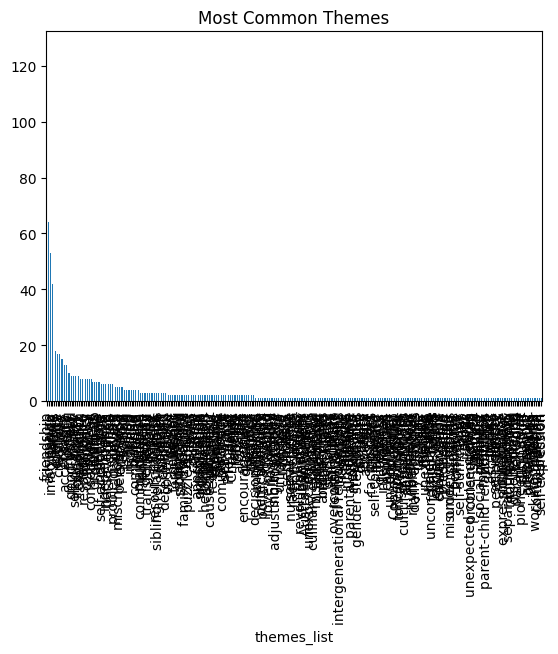

In [7]:
df["themes_list"] = df["themes"].str.split(", ")
theme_counts = df.explode("themes_list")["themes_list"].value_counts()
theme_counts.plot(kind="bar", title="Most Common Themes")

In [12]:
print(theme_counts.head(30))

themes_list
friendship        126
adventure          64
imagination        53
family             42
nature             18
identity           18
courage            17
creativity         17
love               15
bravery            15
acceptance         13
magic              13
loyalty            10
mystery            10
good vs. evil       9
humor               9
self-discovery      9
individuality       9
exploration         9
teamwork            8
resilience          8
responsibility      8
curiosity           8
community           8
survival            8
consequences        8
kindness            7
animals             7
growing up          7
bedtime             7
Name: count, dtype: int64


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

df["tags"] = df["themes"] + " " + df["tone"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["tags"])

kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X)